# Library version 2.0 tests

In [111]:
## This code cell will not be shown in the HTML version of this notebook
# imports from custom library
import sys
sys.path.append('../../')
from mlrefined_libraries import nonlinear_superlearn_library as nonlib
from mlrefined_libraries import unsupervised_library as unsuplib

# demos for this notebook
datapath = '../../mlrefined_datasets/nonlinear_superlearn_datasets/'
unsup_datapath = '../../mlrefined_datasets/unsuperlearn_datasets/'
regress_plotter = nonlib.nonlinear_regression_demos

# import autograd functionality to bulid function's properly for optimizers
import autograd.numpy as np

# this is needed to compensate for %matplotlib notebook's tendancy to blow up images when plotted inline
%matplotlib notebook
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Regression

In [106]:
# load data
csvname = datapath + 'noisy_sin_sample.csv'
data = np.loadtxt(csvname,delimiter = ',')
x = data[:,:-1].T
y = data[:,-1:] 

<IPython.core.display.Javascript object>


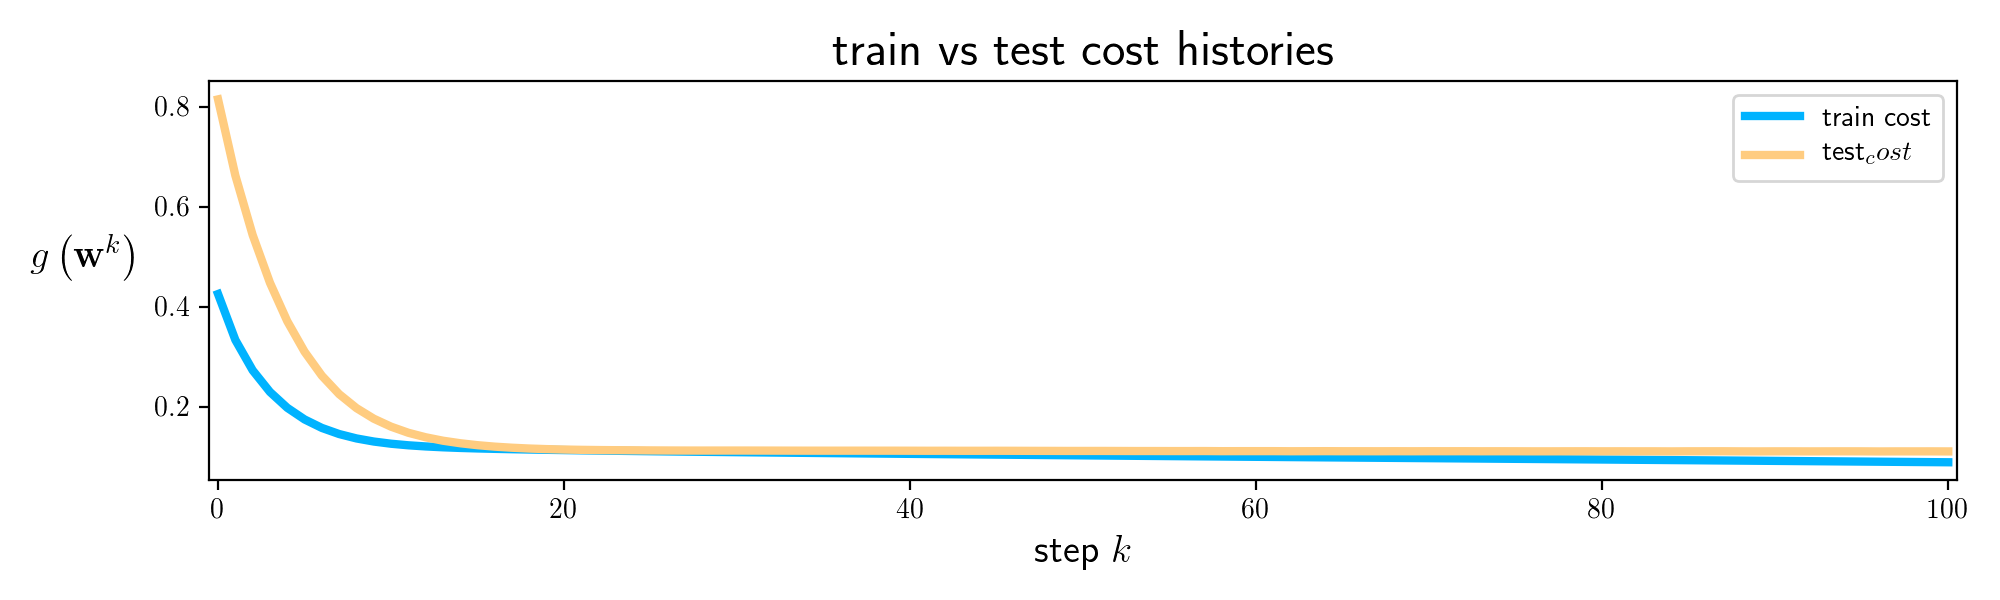

In [148]:
# import the v1 library
forlib = nonlib.library_v2.superlearn_setup.Setup(x,y)

# choose features
forlib.choose_features(name = 'multilayer_perceptron',layer_sizes = [1,100,1])

# split into training and testing sets
forlib.make_train_test_split(train_portion = 0.9)

# choose normalizer
forlib.choose_normalizer(name = 'standard')

# choose cost
forlib.choose_cost(name = 'least_squares')

# fit an optimization
forlib.fit(max_its = 100,alpha_choice = 10**(-1))

# plot cost history
forlib.show_histories()

<IPython.core.display.Javascript object>


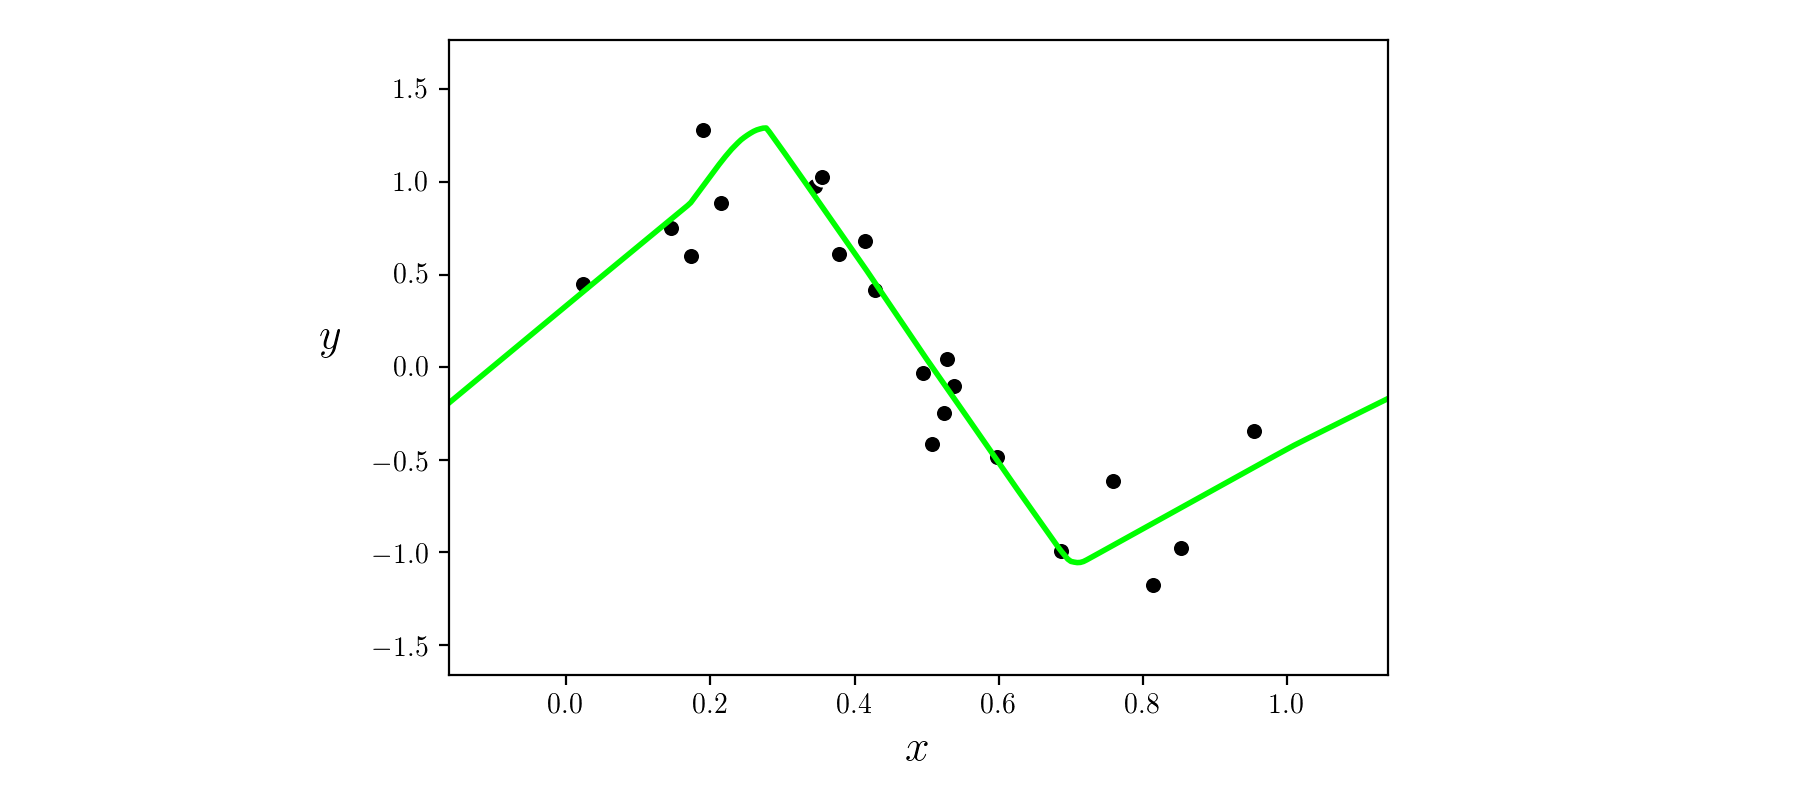

In [147]:
# plot dataset
demo = regress_plotter.Visualizer(data)

# pluck out best weights - those that provided lowest cost, 
# and plot resulting fit
ind = np.argmin(forlib.test_cost_histories[0])
ind = np.argmin(forlib.train_cost_histories[-1])

w_best = forlib.weight_histories[0][ind]
demo.plot_fit(w_best,forlib.model,normalizer = forlib.normalizer);

In [ ]:
forlib.

# two-class classification

In [74]:
demo = nonlib.nonlinear_classification_visualizer.Visualizer(datapath + 'ellipse_2class_data.csv')
x = demo.x.T
y = demo.y[:,np.newaxis]

<IPython.core.display.Javascript object>


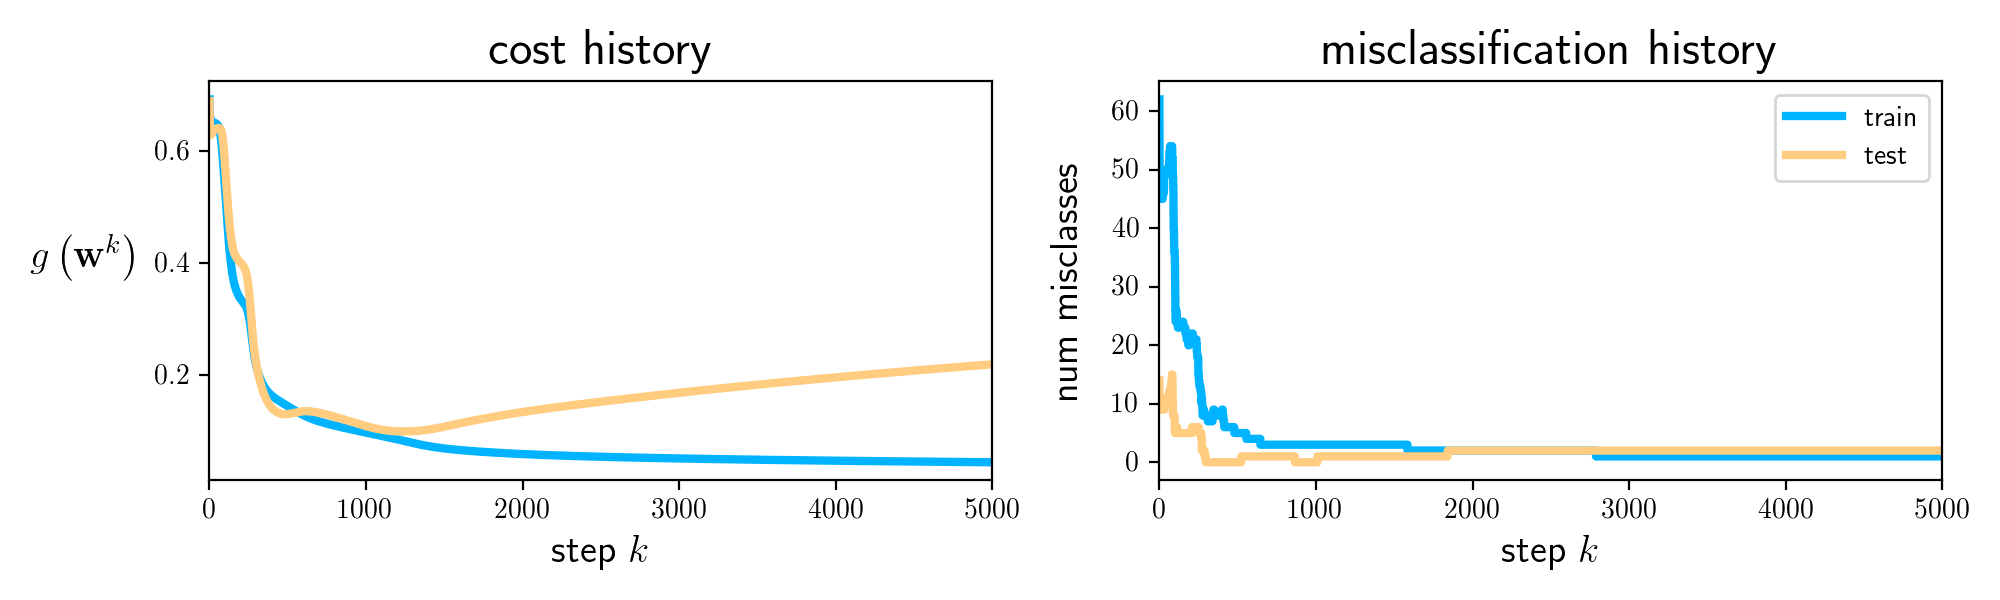

In [77]:
# import the v1 library
mylib = nonlib.library_v2.superlearn_setup.Setup(x,y)

# choose features
mylib.choose_features(name = 'multilayer_perceptron',layer_sizes = [2,10,1],activation = 'tanh')

# choose normalizer
mylib.choose_normalizer(name = 'standard')

# split into training and testing sets
mylib.make_train_test_split(train_portion = 0.8)

# choose cost
mylib.choose_cost(name = 'softmax')

# fit an optimization
mylib.fit(max_its = 5000,alpha_choice = 10**(0))

# plot histories
mylib.show_histories()

# Multiclass classification

In [79]:
demo = nonlib.nonlinear_classification_visualizer.Visualizer(datapath + '3_layercake_data.csv')
x = demo.x.T
y = demo.y[:,np.newaxcis]

<IPython.core.display.Javascript object>


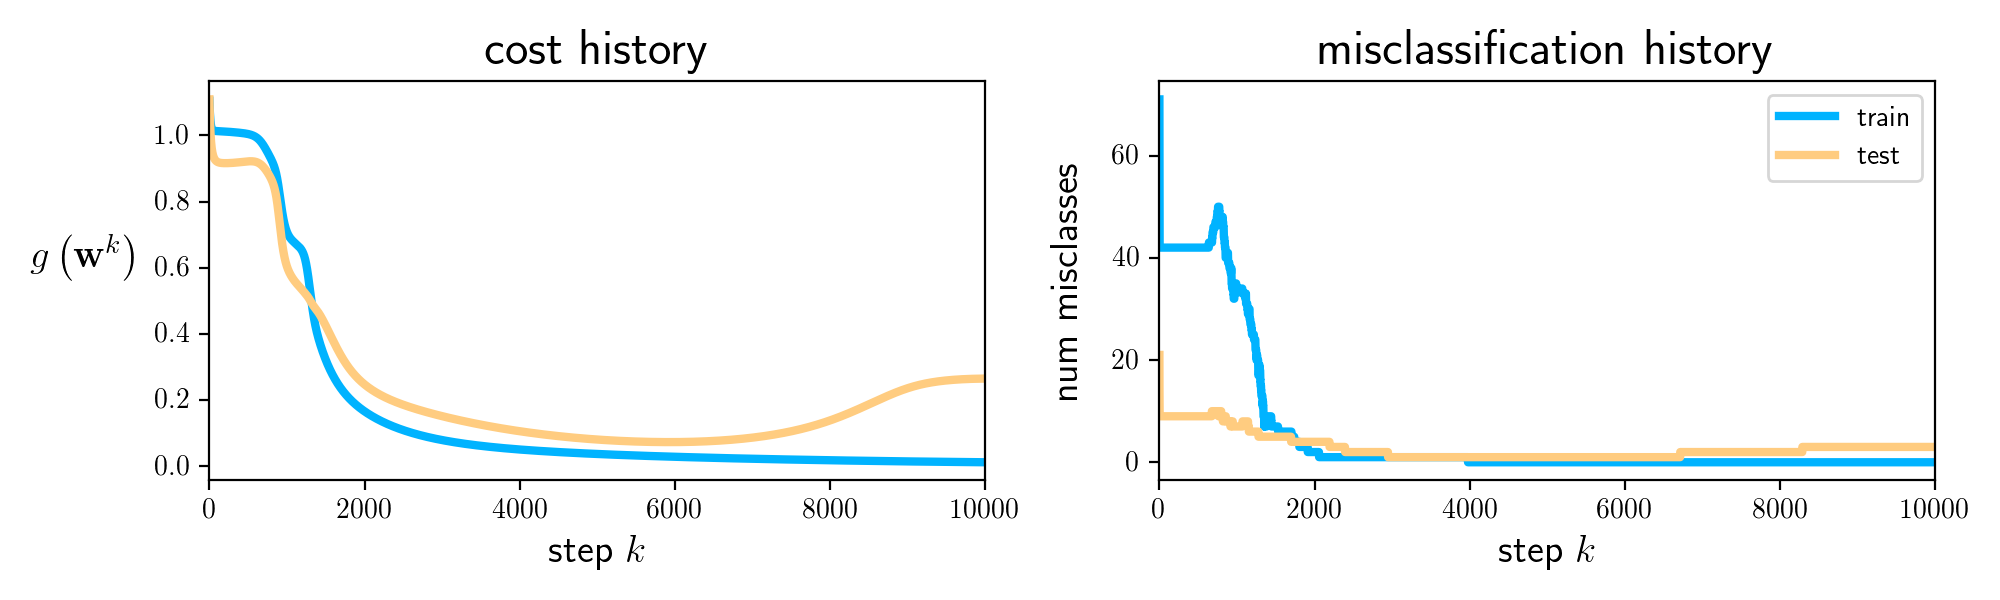

In [82]:
# import the v1 library
mylib = nonlib.library_v2.superlearn_setup.Setup(x,y)

# choose features
mylib.choose_features(name = 'multilayer_perceptron',layer_sizes = [2,10,10,3],activation = 'tanh')

# choose normalizer
mylib.choose_normalizer(name = 'standard')

# split into training and testing sets
mylib.make_train_test_split(train_portion = 0.8)

# choose cost
mylib.choose_cost(name = 'multiclass_softmax')

# fit an optimization
mylib.fit(max_its = 10000,alpha_choice = 10**(-1))

# plot histories
mylib.show_histories()

# Multiclass classification

In [83]:
# load in mnist test set
csvname = '/Users/Nurgetson/Desktop/mnist/mnist_test_contrast_normalized.csv'
data = np.loadtxt(csvname,delimiter = ',')

# get input/output pairs
x = data[:,:-1:].T 
y = data[:,-1:] 

In [93]:
num = 5000
inds = np.random.permutation(len(y))[:num]
x_s = x[:,inds]
y_s = y[inds]

In [96]:
# import the v1 library
mylib = nonlib.library_v2.superlearn_setup.Setup(x_s,y_s)

# choose features
mylib.choose_features(name = 'multilayer_perceptron',layer_sizes = [784,10,10,10,10,10],activation = 'tanh')

# choose normalizer
mylib.choose_normalizer(name = 'standard')

# split into training and testing sets
mylib.make_train_test_split(train_portion = 0.8)

# choose cost
mylib.choose_cost(name = 'multiclass_softmax')

# fit an optimization
mylib.fit(max_its = 5000,alpha_choice = 10**(-1))

# plot histories
# mylib.show_histories()

<IPython.core.display.Javascript object>


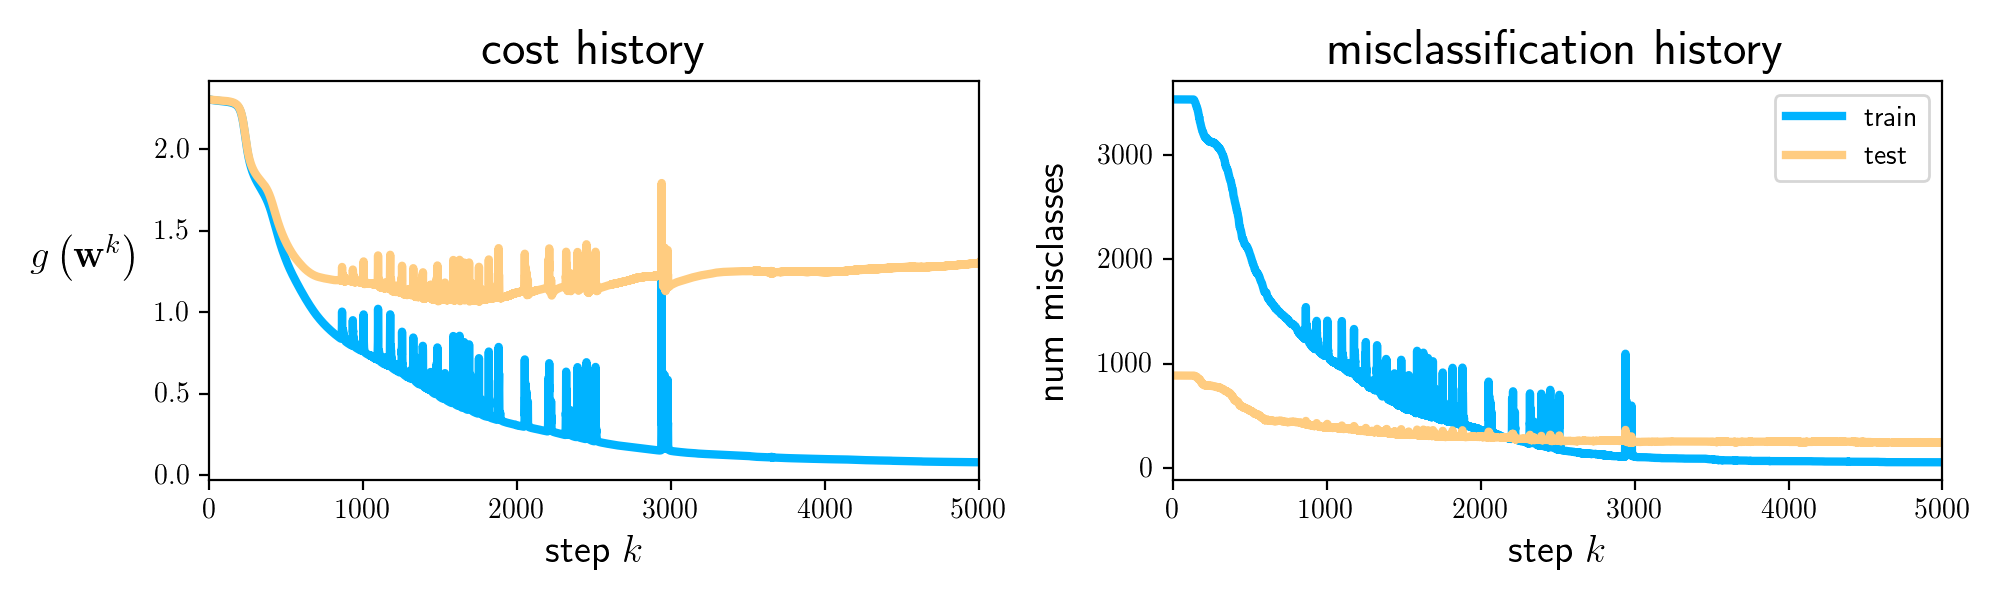

In [97]:
# plot histories
mylib.show_histories()